In [13]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim 

from torchvision import transforms
from torchvision.datasets import MNIST
import torchvision

from tqdm.notebook import trange,tqdm
import numpy as np 
import matplotlib.pyplot as plt 
import time 


In [14]:

batch_size =256
train = MNIST('../data',train = True,download = True ,transform = transforms.ToTensor())
test = MNIST('../data', train = False ,download = True ,transform =  transforms.ToTensor())

In [15]:

train_loader = dataloader.DataLoader(train, shuffle = True , batch_size = batch_size , num_workers = 0, pin_memory = False)
test_loader = dataloader.DataLoader(test, shuffle = True , batch_size = batch_size , num_workers = 0, pin_memory = False)


In [16]:
GPU_index = 0
device = torch.device(GPU_indx if torch.cuda.is_available() else 'cpu')

torch.cuda.is_available()


False

In [17]:
images, labels = next(iter(train_loader))
print("The input data shape is :\n ",images.shape)
print("The target output data shape is :/n",labels.shape)


The input data shape is :
  torch.Size([256, 1, 28, 28])
The target output data shape is :/n torch.Size([256])


In [18]:
labels

tensor([2, 7, 7, 3, 2, 3, 5, 8, 9, 2, 5, 1, 5, 1, 3, 7, 7, 8, 2, 4, 4, 3, 5, 5,
        2, 8, 2, 8, 2, 6, 4, 1, 7, 5, 7, 2, 2, 7, 1, 5, 2, 1, 3, 4, 3, 2, 7, 2,
        0, 1, 7, 3, 7, 7, 1, 0, 4, 7, 3, 3, 4, 2, 3, 1, 7, 9, 2, 9, 4, 2, 7, 8,
        2, 8, 4, 2, 5, 0, 1, 0, 2, 3, 8, 9, 7, 1, 6, 7, 1, 6, 1, 2, 7, 2, 5, 4,
        0, 1, 0, 2, 6, 1, 3, 7, 5, 3, 9, 9, 1, 1, 1, 5, 0, 5, 4, 9, 2, 7, 7, 2,
        2, 7, 8, 7, 8, 2, 4, 6, 7, 0, 3, 8, 6, 1, 8, 3, 7, 2, 2, 0, 8, 9, 3, 8,
        8, 3, 6, 4, 1, 9, 0, 4, 3, 7, 0, 9, 1, 6, 0, 9, 6, 9, 4, 7, 1, 6, 8, 6,
        6, 0, 1, 5, 3, 4, 1, 5, 3, 9, 7, 6, 8, 5, 9, 1, 8, 6, 3, 6, 2, 5, 9, 1,
        0, 1, 0, 9, 0, 5, 8, 7, 4, 8, 0, 1, 9, 0, 1, 0, 6, 7, 9, 7, 2, 1, 9, 1,
        7, 2, 8, 4, 8, 0, 7, 5, 4, 5, 4, 3, 3, 2, 9, 8, 5, 2, 9, 8, 6, 7, 3, 0,
        3, 6, 2, 5, 1, 5, 0, 6, 3, 6, 5, 0, 3, 3, 7, 4])

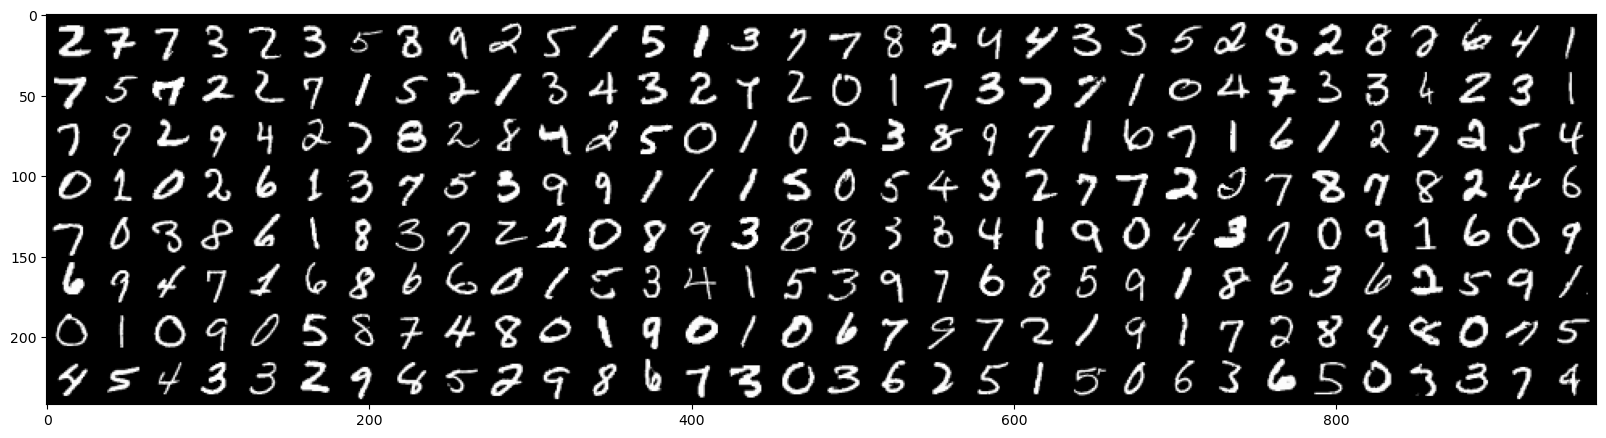

In [19]:
plt.figure(figsize = (20,10))
out = torchvision.utils.make_grid(images,32)
plt.imshow(out.numpy().transpose((1,2,0)))


In [26]:
#lets create a simple MLP network 
class Simple_MLP(nn.Module):
    def __init__(self,num_classes):
        super(Simple_MLP,self).__init__()
         # we will use 4 linear layers 
        # the input to the model is 784 (28x28 - the image size)
        self.fc1 = nn.Linear(784,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,num_classes)

    def forward(self,x):
        x = x.view(x.shape[0],-1)

        x = F.relu(self.fc1(x))  ## picewise non linear activation function 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x= self.fc4(x)

        return x
        

In [30]:

#create our model 
model = Simple_MLP(10).to(device)

#create our loss function 
criterion = nn.CrossEntropyLoss()

#define our loss function and optimizer 

lr = 1e-3
optimizer = optim.Adam(model.parameters(),lr=lr)

n_epochs = 20
print(model)


Simple_MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
def train_epoch(model,train_loader, criterion, optimizer,loss_logger):
    for batch_idx ,(data,target) in enumerate(tqdm(train_loader,desc = "Training",leave = False)):
        outputs = model(data.to(device))
        loss = criterion(outputs, target.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    